<a href="https://colab.research.google.com/github/msk1097/ML-Beginners/blob/master/Simple_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelling the linear relationship between Sales and Advertising dataset**

**Project overview**

In this project, I build a Simple Linear Regression model to study the linear relationship between Sales and Advertising dataset for a dietary weight control product.

**Linear Regression**

Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Simple Linear Regression technique where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.

**Simple Linear Regression (SLR)**

Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables.

In this project, there is one independent or input variable which represents the Sales data and is denoted by X. Similarly, there is one dependent or output variable which represents the Advertising data and is denoted by y. We want to build a linear relationship between these variables. This linear relationship can be modelled by mathematical equation of the form:-

             Y = β0   + β1*X    -------------   (1)


In this equation, X and Y are called independent and dependent variables respectively,

β1 is the coefficient for independent variable and

β0 is the constant term.

β0 and β1 are called parameters of the model.

For simplicity, we can compare the above equation with the basic line equation of the form:-

               y = ax + b       ----------------- (2)

We can see that

slope of the line is given by, a = β1, and

intercept of the line by b = β0.

In this Simple Linear Regression model, we want to fit a line which estimates the linear relationship between X and Y. So, the question of fitting reduces to estimating the parameters of the model β0 and β1.

**Ordinary Least Square Method**

As I have described earlier, the Sales and Advertising data are given by X and y respectively. We can draw a scatter plot between X and y which shows the relationship between them.

Now, our task is to find a line which best fits this scatter plot. This line will help us to predict the value of any Target variable for any given Feature variable. This line is called **Regression line**.

We can define an error function for any line. Then, the regression line is the one which minimizes the error function. Such an error function is also called a **Cost function**.

**Cost Function**

We want the Regression line to resemble the dataset as closely as possible. In other words, we want the line to be as close to actual data points as possible. It can be achieved by minimizing the vertical distance between the actual data point and fitted line. I calculate the vertical distance between each data point and the line. This distance is called the **residual**.

So, in a regression model, we try to minimize the residuals by finding the line of best fit. The residuals are represented by the vertical dotted lines from actual data points to the line.

We can try to minimize the sum of the residuals, but then a large positive residual would cancel out a large negative residual. For this reason, we minimize the sum of the squares of the residuals.

Mathematically, we denote actual data points by yi and predicted data points by ŷi. So, the residual for a data point i would be given as

            di = yi -  ŷi

Sum of the squares of the residuals is given as:

            D = Ʃ di**2       for all data points


This is the **Cost function**. It denotes the total error present in the model which is the sum of the total errors of each individual data point.

We can estimate the parameters of the model β0 and β1 by minimize the error in the model by minimizing D. Thus, we can find the regression line given by equation (1).

This method of finding the parameters of the model and thus regression line is called **Ordinary Least Square Method**.

**The problem statement**

The aim of building a machine learning model is to solve a problem and to define a metric to measure model performance.

The problem is to model and investigate the linear relationship between Sales and Advertising dataset for a dietary weight control product.

I have used two performance metrics RMSE (Root Mean Square Value) and R2 Score value to compute our model performance.

**Software information**

I did this project using Jupyter notebook (Jupyter notebook server 5.5.0).

The server is running on Python (Python 3.6.5), Anaconda distribution.

**Python libraries**

I have Anaconda Python distribution installed on my system. It comes with most of the standard Python libraries I need for this project. The basic Python libraries used in this project are:-

• **Numpy** – It provides a fast numerical array structure and operating functions.

• **pandas** – It provides tools for data storage, manipulation and analysis tasks.

• **Scikit-Learn** – The required machine learning library in Python.

• **Matplotlib** – It is the basic plotting library in Python. It provides tools for making plots.

In [0]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
% matplotlib inline

# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

**About the dataset**

The data set has been imported from the econometrics website with the following url:-

http://www.econometrics.com/intro/sales.htm

This data set contains Sales and Advertising expenditures for a dietary weight control product. It contains monthly data for 36 months. The variables in this data set are Sales and Advertising.

In [9]:
from google.colab import files 
uploaded = files.upload()

Saving SALES.txt to SALES (1).txt


In [0]:
import io 
df = pd.read_csv(io.BytesIO(uploaded['SALES.txt']),sep='\t', header=None) 

**Exploratory data analysis**
First, I import the dataset into the dataframe with the standard read_csv () function of pandas library and assign it to the df variable. Then, I conducted exploratory data analysis to get a feel for the data.

**Pandas shape attribute**
The shape attribute of the pandas dataframe gives the dimensions of the dataframe.

In [11]:
# Exploratory data analysis

# View the dimensions of df

print(df.shape)

(36, 2)


**Pandas head() method**
I viewed the top 5 rows of the pandas dataframe with the pandas head() method.

In [12]:
# View the top 5 rows of df

print(df.head())

      0     1
0  12.0  15.0
1  20.5  16.0
2  21.0  18.0
3  15.5  27.0
4  15.3  21.0


**Pandas columns attribute**
I renamed the column labels of the dataframe with the columns attribute.

In [0]:
# Rename columns of df dataframe

df.columns = ['Sales', 'Advertising']

**Pandas info() method**
I viewed the summary of the dataframe with the pandas info() method.

In [14]:
# View dataframe summary

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Sales          36 non-null float64
Advertising    36 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes
None


**Pandas describe() method**
I look at the descriptive statistics of the dataframe with the pandas describe() method.

In [15]:
# View descriptive statistics

print(df.describe())

           Sales  Advertising
count  36.000000    36.000000
mean   24.255556    28.527778
std     6.185118    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000


**Independent and Dependent Variables**
In this project, I refer Independent variable as Feature variable and Dependent variable as Target variable. These variables are also recognized by different names as follows: -

**Independent variable**
Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. We can denote it as:-

Independent or Input variable (X) = Feature variable = Predictor variable

**Dependent variable**
Dependent variable is also called Output variable and is denoted by y.

Dependent variable is also called Target variable or Response variable. It can be denoted it as follows:-

Dependent or Output variable (y) = Target variable = Response variable

In [0]:
# Declare feature variable and target variable

X = df['Sales'].values
y = df['Advertising'].values

# Sales and Advertising data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

**Visual exploratory data analysis**
I visualize the relationship between X and y by plotting a scatterplot between X and y.

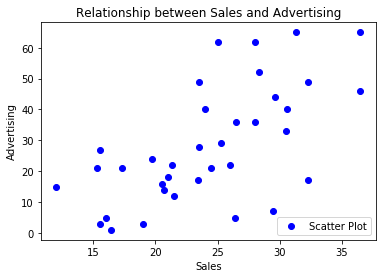

In [18]:
# Plot scatter plot between X and y

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

**Checking dimensions of X and y**

We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API.

It is an important precursor to model building.

In [19]:
# Print the dimensions of X and y

print(X.shape)
print(y.shape)

(36,)
(36,)


**Reshaping X and y**

Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

Its value is inferred from the length of the array and the remaining dimensions.

In [0]:
# Reshape X and y

X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [22]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


**Difference in dimensions of X and y after reshaping**

We can see the difference in diminsions of X and y before and after reshaping.

It is essential in this case because getting the feature and target variable right is an important precursor to model building.

**Train test split**

I split the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data.

In [0]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


**Mechanics of the model**

I split the dataset into two sets – the training set and the test set. Then, I instantiate the regressor lm and fit it on the training set with the fit method.

In this step, the model learned the relationships between the training data (X_train, y_train).

Now the model is ready to make predictions on the test data (X_test). Hence, I predict on the test data using the predict method.

In [0]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)

**Model slope and intercept term**

The model slope is given by lm.coef and model intercept term is given by lm.intercept.

The estimated model slope and intercept values are 1.60509347 and -11.16003616.

So, the equation of the fitted regression line is

y = 1.60509347 * x - 11.16003616

In [26]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: (array([-11.16003616]),)


In [0]:
# So, our fitted regression line is 

# y = 1.60509347 * x - 11.16003616 

# That is our linear model.

**Making predictions**

I have predicted the Advertising values on first five 5 Sales datasets by writing code

    lm.predict(X) [0:5]  


If I remove [0:5], then I will get predicted Advertising values for the whole Sales dataset.

To make prediction, on an individual Sales value, I write

    lm.predict(Xi)


where Xi is the Sales data value of the ith observation.

In [28]:
# Predicting Advertising values

lm.predict(X)[0:5]

# Predicting Advertising values on first five Sales values.

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [31]:
# To make an individual prediction using the linear regression model.

print(str(lm.predict(np.array([24]).reshape(1, 1))))

[[27.36220717]]


**Regression metrics for model performance**

Now, it is the time to evaluate model performance.

For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared Value. These are explained below:-

**RMSE**

RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error. RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

In [32]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 11.2273


**R2 Score**

R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.

Mathematically,

R2 Score = Explained Variation/Total Variation

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

In [33]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.5789


**Interpretation and Conclusion**

The RMSE value has been found to be 11.2273. It means the standard deviation for our prediction is 11.2273. So, sometimes we expect the predictions to be off by more than 11.2273 and other times we expect less than 11.2273. So, the model is not good fit to the data.

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .5789. It means that this model explains 57.89 % of the variance in our dependent variable. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide good fit to the data.

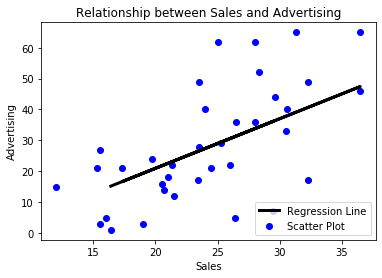

In [34]:
# Plot the Regression Line
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

**Residual analysis**

A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

If we take a look at the generated ‘Residual errors’ plot, we can clearly see that the train data plot pattern is non-random. Same is the case with the test data plot pattern. So, it suggests a better-fit for a non-linear model.

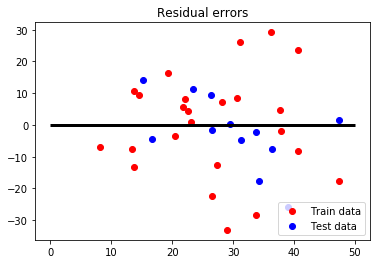

In [35]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

**Checking for Overfitting and Underfitting**

I calculate training set score as 0.2861. Similarly, I calculate test set score as 0.5789. The training set score is very poor. So, the model does not learn the relationships appropriately from the training data. Thus, the model performs poorly on the training data. It is a clear sign of Underfitting. Hence, I validated my finding that the linear regression model does not provide good fit to the data.

Underfitting means our model performs poorly on the training data. It means the model does not capture the relationships between the training data. This problem can be improved by increasing model complexity. We should use more powerful models like Polynomial regression to increase model complexity.

In [36]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.2861
Test set score: 0.5789


In [37]:
# Save model for future use

from sklearn.externals import joblib
joblib.dump(lm, 'lm_regressor.pkl')

# To load the model

# lm2=joblib.load('lm_regressor.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lm_regressor.pkl']

**Simple Linear Regression - Model Assumptions**

The Linear Regression Model is based on several assumptions which are listed below:-

i. Linear relationship ii. Multivariate normality iii. No or little multicollinearity iv. No auto-correlation v. Homoscedasticity

**i. Linear relationship**
The relationship between response and feature variables should be linear. This linear relationship assumption can be tested by plotting a scatter-plot between response and feature variables.

**ii. Multivariate normality**
The linear regression model requires all variables to be multivariate normal. A multivariate normal distribution means a vector in multiple normally distributed variables, where any linear combination of the variables is also normally distributed.

i**ii. No or little multicollinearity**
It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are highly correlated.

**iv. No auto-correlation**
Also, it is assumed that there is little or no auto-correlation in the data. Autocorrelation occurs when the residual errors are not independent from each other.

**v. Homoscedasticity**
Homoscedasticity describes a situation in which the error term (that is, the noise in the model) is the same across all values of the independent variables. It means the residuals are same across the regression line. It can be checked by looking at scatter plot.

**References**

The concepts and ideas in this project have been taken from the following websites and books:-

i. Machine learning notes by Andrew Ng

ii. https://en.wikipedia.org/wiki/Linear_regression

iii.https://en.wikipedia.org/wiki/Simple_linear_regression

iv. https://en.wikipedia.org/wiki/Ordinary_least_squares

v. https://en.wikipedia.org/wiki/Root-mean-square_deviation

vi. https://en.wikipedia.org/wiki/Coefficient_of_determination

vii.https://www.statisticssolutions.com/assumptions-of-linear-regression/

viii.Python Data Science Handbook by Jake VanderPlas

ix. Hands-On Machine Learning with Scikit Learn and Tensorflow by Aurilien Geron

x. Introduction to Machine Learning with Python by Andreas C Muller and Sarah Guido